# Working with Web Data

### Author - Surbhi Nayak

<img src="https://lh5.googleusercontent.com/ccRzhss_n6ueLEAwBgAAqE5xeJEMO7vzTArrxgJ5haxN0y3vg1mq6SR6MuEb-fq-hUF-YuM8TjvLmS8FmhVcwOh6GNUaZwhVbyu1C37ZUL1zfk9azlRSZ0lp_JnJ6dN9-l7fXn3c" width=600 height=200 />


* **Importing all the required libraries for completing tasks**

In [23]:
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
from termcolor import colored
import re

##  Working with HTML and JSON


Here we are taking example of three books of python subject. First we are creating a object for storing json format string and exporting it as json file using dump() method.

In [24]:
python  = [{"title": "Python Cookbook: Recipes for Mastering Python",
    "Authors": "Brian K. Jones, David M. Beazley",
    "Publish_year": 2011,
    "rating": 4.2
    },
    {
    "title": "Python for Data Analysis: Data Wrangling with Pandas, NumPy",
    "Authors": "Wes McKinney",
    "Publish_year": 2011,
    "rating": 4.3
    },
    {
    "title": "Natural Language Processing with Python",
    "Authors": "Edward Loper,Steven Bird, Ewan Klein",
    "Publish_year": 2009,
    "rating": 4.8
    }]

# exporting as json file
with open("Books.json", "w") as outfile:
    json.dump(python, outfile)

For this task we have stored this file on github from local system. Now reading json file from github in dataframe using read_json() method from pandas library.

In [3]:
df_books_json = pd.read_json('https://raw.githubusercontent.com/surbhinayak10/DataAnalysisProjects/main/M9_Working_with_web_data/Books.json')
df_books_json

,title,Authors,Publish_year,rating
0,Python Cookbook: Recipes for Mastering Python,"Brian K. Jones, David M. Beazley",2011,4.2
1,Python for Data Analysis: Data Wrangling with ...,Wes McKinney,2011,4.3
2,Natural Language Processing with Python,"Edward Loper,Steven Bird, Ewan Klein",2009,4.8


In [4]:
html_book_table  = """<table>
<thead>
  <tr>
    <th>title</th>
    <th>Authors</th>
    <th>Publish_year</th>
    <th>rating</th>
  </tr>
</thead>
<body>
  <tr>
    <td>Python Cookbook: Recipes for Mastering Python</td>
    <td>Brian K. Jones, David M. Beazley</td>
    <td>2011</td>
    <td>4.2</td>
  </tr>
 <tr>
    <td>Python for Data Analysis: Data Wrangling with Pandas, NumPy</td>
    <td>Wes McKinney</td>
    <td>2011</td>
    <td>4.3</td>
  </tr>
  <tr>
    <td>Natural Language Processing with Python</td>
    <td>Edward Loper,Steven Bird, Ewan Klein</td>
    <td>2009</td>
    <td>4.8</td>
  </tr>
</body>
</table>"""

Html_file= open("Books.html","w")
Html_file.write(html_book_table)
Html_file.close()

In [5]:
df_books = pd.read_html("https://raw.githubusercontent.com/surbhinayak10/DataAnalysisProjects/main/M9_Working_with_web_data/Books.html")
df_books_html = df_books[0]
df_books_html

,title,Authors,Publish_year,rating
0,Python Cookbook: Recipes for Mastering Python,"Brian K. Jones, David M. Beazley",2011,4.2
1,Python for Data Analysis: Data Wrangling with ...,Wes McKinney,2011,4.3
2,Natural Language Processing with Python,"Edward Loper,Steven Bird, Ewan Klein",2009,4.8


Now verifying both the dataframe are similar or not as they are created with the different files which are 'json' and 'html'.

In [6]:
# Checking does both the dataframe has same values 
df_books_html.eq(df_books_json)

,title,Authors,Publish_year,rating
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True


## Scraping the Katz School’s AI Faculty Web Page


From within your Python environment, download the web page containing the Katz School’s AI Faculty
information (https://www.yu.edu/katz/programs/graduate/artificial-intelligence/faculty) using
whatever Python method you feel is most appropriate

In [7]:
url ='https://www.yu.edu/katz/programs/graduate/artificial-intelligence/faculty'

website = requests.get(url)

Create a BeautifulSoup class to parse the page you have downloaded

In [8]:
soup = BeautifulSoup(website.content, 'html')
#print(soup.prettify())

Within the downloaded content of the web page, use your Python skills to locate the div with
class=”body”, and assign the results to a variable named faculty.

In [9]:
faculty = soup.find('div', class_='body')
faculty

<div class="body"><h5>Paul Russo, Ph.D. Vice Provost and Dean</h5>
<p>Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&amp;Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-P

Create a Pandas dataframe named faculty_info having columns name, title, bio, and teaching
background. Each column should be capable of storing character strings.


In [10]:
faculty_lst = faculty.find_all(['h5','p'])
faculty_lst

[<h5>Paul Russo, Ph.D. Vice Provost and Dean</h5>,
 <p>Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&amp;Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M aw

In [11]:
dic_faculty = {'name':[],'title':[],'bio':[], 'background':[]}

for i in range(0, len(faculty_lst),3):
    
    dic_faculty['name'].append(faculty_lst[i].text.split(',')[0])
    dic_faculty['title'].append(faculty_lst[i].text.split(',')[1])
    dic_faculty['bio'].append(faculty_lst[i+1].text)
    dic_faculty['background'].append(faculty_lst[i+2].text)
    
dic_faculty

{'name': ['Paul Russo',
  'Andy Catlin',
  'Sergey Fogelson',
  'Lawrence Fulton',
  'Jeff Nieman',
  'David Sweet'],
 'title': [' Ph.D. Vice Provost and Dean',
  ' Program Director',
  ' Instructor',
  ' Instructor',
  ' Instructor',
  ' Instructor'],
 'bio': ['Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collec

In [12]:
df_faculty = pd.DataFrame(dic_faculty)
df_faculty

,name,title,bio,background
0,Paul Russo,Ph.D. Vice Provost and Dean,Recent research examines computational methods...,"Teaches graduate courses in Social Computing, ..."
1,Andy Catlin,Program Director,Data scientist and data system developer with ...,Teaches graduate courses in Analytics Programm...
2,Sergey Fogelson,Instructor,Data scientist and data product architect with...,Teaches graduate courses in Computational Stat...
3,Lawrence Fulton,Instructor,Health data scientist with expertise in machin...,"Teaches graduate courses in Data Analytics, Ma..."
4,Jeff Nieman,Instructor,Data scientist and project manager with expert...,Teaches graduate courses in Predictive Modelin...
5,David Sweet,Instructor,David Sweet is a quantitative trader and forme...,Teaches Predictive Analytics.


## Working with Web API’s

For this task I am working with the 'Top Stories' API from NY Times and concentrating on 'home' section which contains articles about all the sections.

In [13]:
key = '6Kgcsa4pw8IBi16XjeHWSXIx8JmgG1Cp'
url = 'https://api.nytimes.com/svc/topstories/v2/home.json?api-key='+ key 
r = requests.get(url)
data = r.json()

Schema - https://developer.nytimes.com/docs/top-stories-product/1/types/Article

In [14]:
data_df= pd.DataFrame.from_dict(data)
data_df.head()

,status,copyright,section,last_updated,num_results,results
0,OK,Copyright (c) 2021 The New York Times Company....,home,2021-11-12T23:25:15-05:00,57,"{'section': 'us', 'subsection': 'politics', 't..."
1,OK,Copyright (c) 2021 The New York Times Company....,home,2021-11-12T23:25:15-05:00,57,"{'section': 'us', 'subsection': 'politics', 't..."
2,OK,Copyright (c) 2021 The New York Times Company....,home,2021-11-12T23:25:15-05:00,57,"{'section': 'us', 'subsection': 'politics', 't..."
3,OK,Copyright (c) 2021 The New York Times Company....,home,2021-11-12T23:25:15-05:00,57,"{'section': 'nyregion', 'subsection': '', 'tit..."
4,OK,Copyright (c) 2021 The New York Times Company....,home,2021-11-12T23:25:15-05:00,57,"{'section': 'us', 'subsection': 'politics', 't..."


In [15]:
data_df.shape

(57, 6)

In [16]:
# creating list to store each row 
lst= [i for i in data_df['results']]


#creating dataframe 
df_all = pd.DataFrame.from_dict(lst)
df_all

,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,us,politics,Bannon Indicted on Contempt Charges Over House...,"Stephen K. Bannon, a former top aide to Donald...",https://www.nytimes.com/2021/11/12/us/politics...,nyt://article/a0873dd9-e34a-5b83-a8dd-282e3a60...,By Katie Benner and Luke Broadwater,Article,2021-11-12T22:29:26-05:00,2021-11-12T16:05:23-05:00,2021-11-12T16:05:23-05:00,,,"[United States Politics and Government, Stormi...",[House of Representatives],"[Bannon, Stephen K, Trump, Donald J]",[],[{'url': 'https://static01.nyt.com/images/2021...,https://nyti.ms/3F9uNlY
1,us,politics,Menace Enters the Republican Mainstream,Threats of violence have become commonplace am...,https://www.nytimes.com/2021/11/12/us/politics...,nyt://article/f81d1ec7-c207-5640-9fcc-3fd5c399...,By Lisa Lerer and Astead W. Herndon,Article,2021-11-12T22:35:16-05:00,2021-11-12T14:09:32-05:00,2021-11-12T14:09:32-05:00,,,"[Threats and Threatening Messages, United Stat...",[Republican Party],"[Trump, Donald J]",[],[{'url': 'https://static01.nyt.com/images/2021...,https://nyti.ms/3kynoEP
2,us,politics,Democrats’ Bill Would Deny For-Profit College ...,Critics say a little-noticed provision would h...,https://www.nytimes.com/2021/11/12/us/politics...,nyt://article/d4c30f50-47e9-5a97-9e17-bb082ec6...,By Erica L. Green,Article,2021-11-12T22:42:30-05:00,2021-11-12T15:56:07-05:00,2021-11-12T15:56:07-05:00,,,"[For-Profit Schools, Financial Aid (Education)...","[Democratic Party, ITT Technical Institute, Co...","[Biden, Joseph R Jr]",[],[{'url': 'https://static01.nyt.com/images/2021...,https://nyti.ms/3omcPG1
3,nyregion,,Ocasio-Cortez Isn’t Wavering. Are New Yorkers ...,"By voting no on the infrastructure bill, Repre...",https://www.nytimes.com/2021/11/12/nyregion/ao...,nyt://article/568f0599-b066-5950-9add-49e81922...,By Katie Glueck and Nicholas Fandos,Article,2021-11-12T16:45:23-05:00,2021-11-12T03:00:08-05:00,2021-11-12T03:00:08-05:00,,,"[Infrastructure (Public Works), Law and Legisl...","[Democratic Party, House of Representatives]","[Ocasio-Cortez, Alexandria]","[New York City, Bronx (NYC), Queens (NYC)]",[{'url': 'https://static01.nyt.com/images/2021...,https://nyti.ms/3FpCqFd
4,us,politics,Appeals Court Extends Block on Biden’s Vaccine...,A three-judge panel of the U.S. Court of Appea...,https://www.nytimes.com/2021/11/12/us/politics...,nyt://article/cb8695ea-1a96-5baa-a64f-edda71cc...,By Charlie Savage,Article,2021-11-12T22:50:42-05:00,2021-11-12T20:59:26-05:00,2021-11-12T20:59:26-05:00,,,"[Coronavirus (2019-nCoV), Workplace Hazards an...",[Occupational Safety and Health Administration],"[Biden, Joseph R Jr, Engelhardt, Kurt Damian]",[],[{'url': 'https://static01.nyt.com/images/2021...,https://nyti.ms/31YXnIv
5,business,media,"On Podcasts and Radio, Misleading Covid-19 Tal...",False statements about vaccines have spread on...,https://www.nytimes.com/2021/11/12/business/me...,nyt://article/517c87ad-a6d5-5f9c-b4f7-b9c3ae21...,By Tiffany Hsu and Marc Tracy,Article,2021-11-12T17:58:31-05:00,2021-11-12T14:33:37-05:00,2021-11-12T14:33:37-05:00,,,"[Coronavirus (2019-nCoV), Rumors and Misinform...","[iHeartMedia Inc, Apple Inc, Spotify]","[Wiles, Rick, Enyart, Bob (d 2021), Bernier, M...",[],[{'url': 'https://static01.nyt.com/images/2021...,https://nyti.ms/3wEtM2e
6,arts,music,Judge Ends Conservatorship Overseeing Britney ...,"The pop star had called the arrangement, which...",https://www.nytimes.com/2021/11/12/arts/music/...,nyt://article/c626ac74-3e22-5795-a05b-b147af2b...,By Joe Coscarelli and Julia Jacobs,Article,2021-11-12T22:43:48-05:00,2021-11-12T19:16:27-05:00,2021-11-12T19:16:27-05:00,,,"[Wills and Estates, Appointments and Executive...",[],"[Spears, Britney, Spears, Jamie (1952- ), Rose...",[],[{'url': 'https://static01.nyt.com/images/2021...,https://nyti.ms/30kBrHs
7,climate,,Glasgow Climate Talks Are Down to 

In [17]:
df_all['subsection'] = df_all['subsection'].replace(r'^\s*$', 'other', regex=True)

In [18]:
# Checking null values in the dataframe
df_all.isnull().sum()

section                0
subsection             0
title                  0
abstract               0
url                    0
uri                    0
byline                 0
item_type              0
updated_date           0
created_date           0
published_date         0
material_type_facet    0
kicker                 0
des_facet              0
org_facet              0
per_facet              0
geo_facet              0
multimedia             0
short_url              0
dtype: int64

Data is clean there is no value is present in data set

In [19]:
# Distinct Sections present in dataset
df_all['section'].value_counts()

opinion       14
us            12
business       4
sports         4
arts           4
nyregion       3
well           3
world          2
style          2
climate        2
podcasts       2
parenting      2
theater        1
technology     1
briefing       1
Name: section, dtype: int64

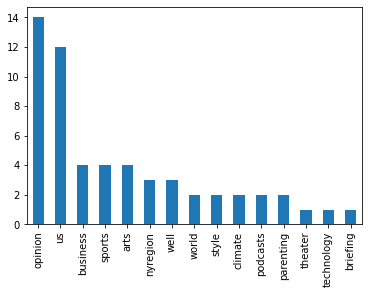

In [20]:
# Visualization for distinct Sections present in dataset
df_all['section'].value_counts().plot(kind = 'bar');

In [21]:
section = df_all['section'].unique()

for i in section:
    print(colored(i.upper(),'blue'),'\n')
    print(df_all['subsection'][df_all['section']==i].value_counts())
    print('------------------------------------------------------','\n')

US 

politics    6
other       6
Name: subsection, dtype: int64
------------------------------------------------------ 

NYREGION 

other    3
Name: subsection, dtype: int64
------------------------------------------------------ 

BUSINESS 

other      2
economy    1
media      1
Name: subsection, dtype: int64
------------------------------------------------------ 

ARTS 

music     3
design    1
Name: subsection, dtype: int64
------------------------------------------------------ 

CLIMATE 

other    2
Name: subsection, dtype: int64
------------------------------------------------------ 

WORLD 

asia      1
europe    1
Name: subsection, dtype: int64
------------------------------------------------------ 

SPORTS 

basketball    1
football      1
other         1
soccer        1
Name: subsection, dtype: int64
------------------------------------------------------ 

STYLE 

other    2
Name: subsection, dtype: int64
------------------------------------------------------ 

OPINION 

other

In [22]:
# In this data for opinion section we have high frequency data 

df_all[['section','subsection','title','abstract','byline']][df_all['section']=='opinion']

,section,subsection,title,abstract,byline
18,opinion,other,It’s Time to Get Honest About the Biden Doctrine,"Twentieth-century frameworks, paradigms and do...",By Anne-Marie Slaughter
19,opinion,other,How Kyrsten Sinema Uses Clothing to Signal Her...,The senator is trying to play many roles in Wa...,By Tressie McMillan Cottom
20,opinion,other,A Frenzy of Book Banning,The right-wing war on school libraries.,By Michelle Goldberg
21,opinion,other,Consumers Are Resisting Inflation,The jump in prices has them saying it’s not su...,By Peter Coy
22,opinion,other,"If You Have Something to Say, Then Say It",Why do we prize writing skills over the abilit...,By John McWhorter
23,opinion,other,You Are the Object of a Secret Extraction Oper...,Ending data extraction is the key to ending su...,By Shoshana Zuboff
24,opinion,other,"Joe Manchin, This Is What We Can’t Afford","Sure, Biden’s plan costs a lot of money. But t...",By Bryce Covert
25,opinion,other,The Mainstream Media Has a Republican Party Pr...,Jay Rosen on how the press fundamentally misun...,By ‘The Ezra Klein Show’
26,opinion,other,The Many Deaths of William Holden Taught Me Ho...,My father’s tales kept me safe.,By Alexander Aciman
27,opinion,letters,The Challenges Faced by the Democrats,Readers discuss Maureen Dowd’s criticisms of P...,


References:

1. https://stackoverflow.com/questions/16523939/how-to-write-and-save-html-file-in-python/45699054

2. https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

3. https://martinheinz.dev/blog/31

4. https://stackoverflow.com/questions/17751626/create-a-pandas-dataframe-from-multiple-dicts

5. https://www.nylas.com/blog/use-python-requests-module-rest-apis/